## Linear Regression
An estimator is any model that tries to estimate a variable y from another variable(s) x given pairs of data (x<sub>1</sub>,y<sub>1</sub>),(x<sub>2</sub>,y<sub>2</sub>),...,(x<sub>N</sub>,y<sub>N</sub>)

Regression is when the targets (y) are quantities (not cat vs dog but rather price of a house)

An example would be trying to guess how many people will buy icecream from a shop at any day given the temprature on that day. In this case, the target is the number of icecream people will buy, it is an integer and any value (ex: 14 icecreams) doesn't represent a particular class, so it will be represented as a regression problem. In this case, it turns out that x is also a quantity (temprature); however, this is not necessary and is tackled by approaches other than linear regression.

To estimate the price of the icecream from temperature we gather the data on various days from various different places and get the following data.



We can see that a line (could  also be a curve) could fit the data, but how can we find which line exactly.

#### Line Equation Review
A line in 2D can be parametrized using a slope m and a y-intercept b which would result in it having an equation

$$y = mx+b$$

In the example of the icecream, if the temperature at a day was 30, our prediction for the number of icecreams sold would be m\*30 + b, so we simply need to find m and b.

#### Squared Loss
We need some measurement of how good our line is to be able to find the "best" line, so we will measure the difference between our predictions and the correct values from the data.


Then, we will square all the differences and add them up. This will be the value we try to minimize.

#### Note
The normal equation will probably not work. It is left for you to figure it out and let everyone else know, let's see who figures it out first (it's a tricky issue).




In [242]:
import numpy as np
import pandas as pd

In [243]:
class Linear_Regression():
    '''
    Linear Regression model created using only NumPy
    
    Attributes
    ----------
    weights: np.array of floats
        All the parameters of the model (including bias)
    '''
    def __init__(self):
        self.weights = None
        
    def train(self,data_X,data_y):
        '''
        Train the model using the given data
        
        Parameters
        ----------
        data_X: np.array, shape = (N, num_features)
            Features from the data, each row is one data point. Assumes that a column of ones was added to data_X
        data_y: np.array, shape = (N, num_targets)
            The target values to predict, each row contains the targets for one data point
        '''
        ########################## Insert code here ##########################
        
        A = np.linalg.pinv(data_X.T@data_X).dot(data_X.T@data_y).T.reshape(-1,1) #to get A as a 2D array 
        return A
    
    def predict(self,x_to_predict):
        '''
        Predict using the given value as input
        
        Assumes that self.train(.,.) has been called before calling this method
        
        Parameters
        ----------
        x_to_predict: np.array, shape = (M, num_features)
            A given list of inputs to predict targets for, each row is one input. Assumes that a column of ones was added similar to the training data
        
        Returns
        -------
        np.array of floats, shape = (M, num_targets)
            Predicted values for each input
        '''
        predicted_y = (x_to_predict@A)
        return predicted_y
        

### Import the data and remove useless columns

In [244]:
df = pd.read_csv("train.csv")
df.drop(columns=["Id"],inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Handle the missing data (NaNs)

In [245]:
df.drop(columns=df.columns[df.isnull().sum().values>200],inplace=True)
df.dropna(inplace=True)
df.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Replace categorical data (strings) with numerical values

In [246]:
obj_to_replace = df["MSZoning"].dtype

for column in df.columns:
    if df[column].dtype == obj_to_replace:
        uniques = np.unique(df[column].values)
        for idx,item in enumerate(uniques):
            df[column] = df[column].replace(item,idx)
            
df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,3,3,0,4,0,5,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,11250,1,0,3,0,4,0,5,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,9550,1,0,3,0,0,0,6,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,14260,1,0,3,0,2,0,15,...,0,0,0,0,0,12,2008,8,4,250000


### Add the bias column (column of ones)

In [247]:
df["bias"] = np.ones(df.shape[0])
df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,bias
0,60,3,8450,1,3,3,0,4,0,5,...,0,0,0,0,2,2008,8,4,208500,1.0
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,5,2007,8,4,181500,1.0
2,60,3,11250,1,0,3,0,4,0,5,...,0,0,0,0,9,2008,8,4,223500,1.0
3,70,3,9550,1,0,3,0,0,0,6,...,0,0,0,0,2,2006,8,0,140000,1.0
4,60,3,14260,1,0,3,0,2,0,15,...,0,0,0,0,12,2008,8,4,250000,1.0


### Divide the data into training, testing, X, and y

In [248]:
df = df.sample(frac=1).reset_index(drop=True)
training_df = df[:-100]
val_df = df[-100:]
training_y = training_df["SalePrice"].values
training_X = training_df.drop(columns=["SalePrice"]).values
val_y = val_df["SalePrice"].values
val_X = val_df.drop(columns=["SalePrice"]).values

print(training_X.shape)
print(np.mean(training_y))

(1238, 74)
185575.68659127626


### Train the linear regressor

In [249]:
# Create and fit the model
LR_regressor = Linear_Regression()
A = LR_regressor.train(training_X,training_y)
print(A)

[[-1.10877966e+02]
 [-1.35094777e+03]
 [ 4.56200293e-01]
 [ 3.96317058e+04]
 [-1.00770998e+03]
 [ 2.67438402e+03]
 [-5.22723711e+04]
 [ 1.53364062e+02]
 [ 3.61244306e+03]
 [ 1.58212955e+02]
 [ 2.40283806e+02]
 [-7.21762853e+02]
 [-1.45203769e+03]
 [-1.05807064e+03]
 [ 1.13896974e+04]
 [ 4.82535234e+03]
 [ 2.28366255e+02]
 [-2.37947041e+01]
 [ 3.45023323e+03]
 [ 3.22416943e+03]
 [-1.08858425e+03]
 [ 2.44849644e+02]
 [ 6.43681991e+03]
 [ 3.23733162e+01]
 [-9.35588624e+03]
 [-7.63311292e+01]
 [ 1.37989024e+03]
 [-8.30709687e+03]
 [ 3.07678212e+03]
 [-3.43839173e+03]
 [-1.17873052e+03]
 [ 2.43337539e+00]
 [ 3.61342533e+02]
 [ 3.13262163e+00]
 [-3.44296053e+00]
 [ 2.06125077e+00]
 [-8.75150607e+03]
 [-5.25025796e+02]
 [ 5.35784213e+03]
 [-4.15922285e+02]
 [ 7.72833078e+00]
 [ 4.33747678e+00]
 [-1.61331861e+01]
 [ 5.28907878e+01]
 [ 6.54273168e+03]
 [ 2.54659382e+03]
 [ 1.99895671e+03]
 [-1.61433483e+03]
 [-4.72276594e+03]
 [-2.14126271e+04]
 [-9.07923787e+03]
 [ 1.70657473e+03]
 [ 4.2474665

### Train using the sklearn linear regressor

In [250]:
from sklearn.linear_model import LinearRegression
# Create and fit the model

model = LinearRegression()
model.fit(training_X,training_y)

r_sq = model.score(training_X,training_y)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

print("\n\n")
coefficients_array=model.coef_.reshape(-1,1)
coefficients_array[-1]=model.intercept_
print(coefficients_array)


coefficient of determination: 0.8538533365121563
intercept: 1993274.5417702738
slope: [-1.10877967e+02 -1.35094780e+03  4.56200294e-01  3.96317065e+04
 -1.00770995e+03  2.67438400e+03 -5.22724122e+04  1.53364034e+02
  3.61244324e+03  1.58212966e+02  2.40283833e+02 -7.21762560e+02
 -1.45203764e+03 -1.05807055e+03  1.13896974e+04  4.82535245e+03
  2.28366257e+02 -2.37947090e+01  3.45023316e+03  3.22416939e+03
 -1.08858426e+03  2.44849655e+02  6.43681986e+03  3.23733167e+01
 -9.35588621e+03 -7.63309030e+01  1.37989025e+03 -8.30709682e+03
  3.07678211e+03 -3.43839169e+03 -1.17873053e+03  2.41792878e+00
  3.61342557e+02  3.11717535e+00 -3.45840714e+00  2.07669696e+00
 -8.75150610e+03 -5.25025828e+02  5.35784234e+03 -4.15922470e+02
  2.19678727e+01  1.85770182e+01 -1.89364465e+00  3.86512461e+01
  6.54273158e+03  2.54659436e+03  1.99895658e+03 -1.61433504e+03
 -4.72276599e+03 -2.14126274e+04 -9.07923794e+03  1.70657480e+03
  4.24746654e+03  1.66865461e+03  7.28235596e+02 -1.14680834e+02
 -1.

In [251]:
############### test the data with the obtained array of coefficients ##############

Predicted_y_for_model_testing = LR_regressor.predict(training_X)
print(Predicted_y_for_model_testing)
print(training_X.size)


[[124226.40211384]
 [136755.57821775]
 [236113.90485597]
 ...
 [108760.38081757]
 [241417.91945796]
 [248671.74470237]]
91612


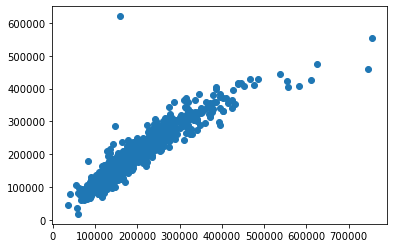

In [252]:
########## plot prediction vs real value to visualize how well the model performed ##################
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(training_y,Predicted_y_for_model_testing)

In [253]:
######################## Calculate Mean Absolute Error (Easier to interpret than MSE) ##########################

num = 0
for i in range(training_y.shape[0]):
    num += abs(training_y[i] - Predicted_y_for_model_testing[i])
Error = num / training_y.shape[0]
print(Error)

print("\n\n")

# using sklearn
from sklearn.metrics import mean_absolute_error
Error_sk = mean_absolute_error(training_y, Predicted_y_for_model_testing)
print(Error_sk)

[18462.52247462]



18462.522474620535


In [254]:
################ importing test data and removing useless columns ##############

tf = pd.read_csv("test.csv")
tf.drop(columns=["Id"],inplace=True)

######################### removing missing data ################################

tf.drop(columns=tf.columns[tf.isnull().sum().values>200],inplace=True)
tf.dropna(inplace=True)
tf.isnull().sum().values

################### replacing strings with numerical data ######################

obj_to_replace = tf["MSZoning"].dtype

for column in tf.columns:
    if tf[column].dtype == obj_to_replace:
        uniques = np.unique(tf[column].values)
        for idx,item in enumerate(uniques):
            tf[column] = tf[column].replace(item,idx)
            

########################### add colum of ones ##################################

tf["bias"] = np.ones(tf.shape[0])

##########################  get testing_x array  ###############################

tf = tf.sample(frac=1).reset_index(drop=True)
testing_tf = tf[:-100]
val_tf = tf[-100:]

testing_X = testing_tf


print(testing_X.shape)

(1219, 74)


In [255]:
################### predict prices of test data #####################

Predicted_y=LR_regressor.predict(testing_X)
print(Predicted_y)
print(Predicted_y.size)

                  0
0     199493.497137
1     298461.850117
2      71115.374726
3     129495.678731
4     105042.900181
...             ...
1214  113245.641082
1215  122938.497415
1216  175944.144715
1217  221157.041811
1218  204366.223400

[1219 rows x 1 columns]
1219
